# Fraud Detection - Pankaj Bhanushali - 08/02/2020

Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing dataset and visualising

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

Checking class imbalance

In [4]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

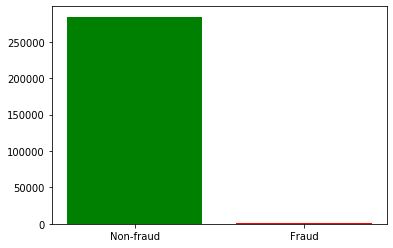

In [5]:
plt.bar(['Non-fraud','Fraud'],classes,color=['g','r'])
plt.show()

In [6]:
df['Time']=df['Time']/60*60

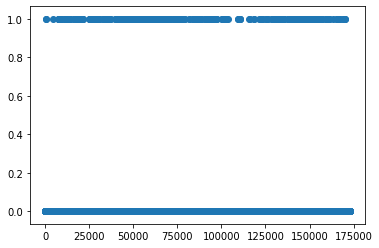

In [7]:
plt.scatter(df['Time'],df['Class'])
plt.show()

In [8]:
df.drop('Time', axis=1, inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


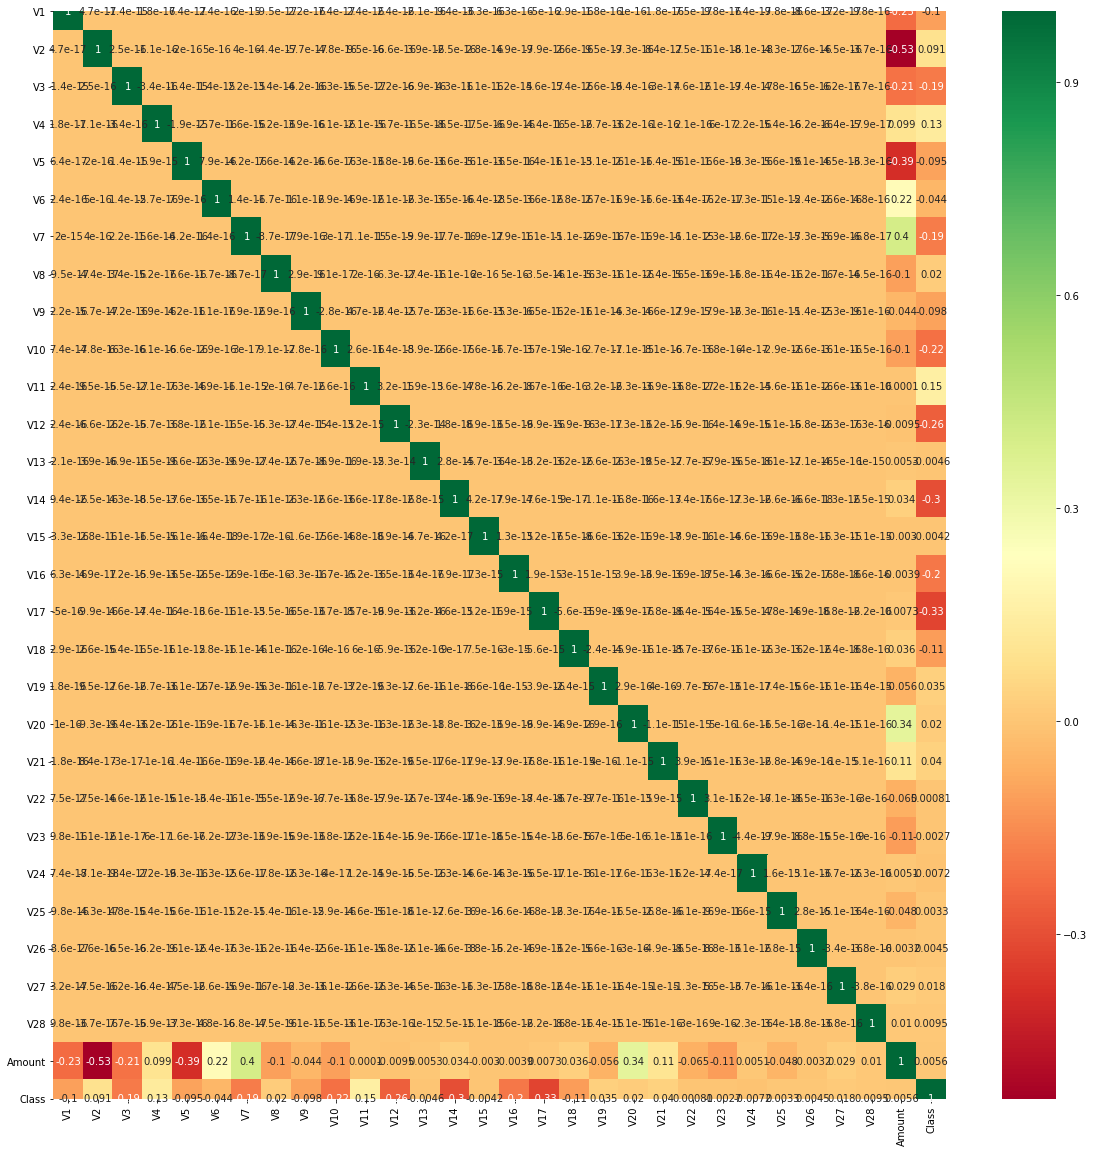

In [9]:
corrmat=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df[corrmat.index].corr(),annot=True,cmap="RdYlGn")

In [10]:
y=df['Class']
df.drop('Class',axis=1,inplace=True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


Splitting dataset in to train and test data

In [11]:
from sklearn import model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(df,y,stratify=y,random_state=0)

(array([ 1.,  0.,  0., ..., 57., 13.,  3.]),
 array([-56.40750963, -56.37995231, -56.35239499, ...,   2.39981535,
          2.42737267,   2.45492999]),
 <a list of 2136 Patch objects>)

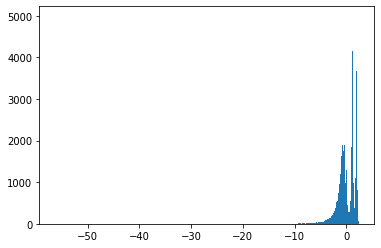

In [12]:
plt.hist(X_train.iloc[:,0],bins=int(X_train.shape[0]/100))

Handling the skewness of distribution

(array([1., 0., 0., ..., 0., 0., 2.]),
 array([-8.50663242, -8.50177547, -8.49691852, ...,  1.85809652,
         1.86295347,  1.86781042]),
 <a list of 2136 Patch objects>)

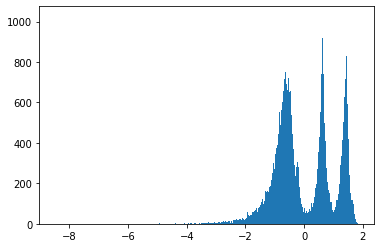

In [13]:
from sklearn import preprocessing
pt = preprocessing.PowerTransformer(copy=False)
pt.fit_transform(X_train)
pt.transform(X_test)

plt.hist(X_train.iloc[:,0],bins=int(X_train.shape[0]/100))

In [14]:
num_cv_splits = 3
skf = model_selection.StratifiedKFold(n_splits=num_cv_splits, shuffle=True, random_state=0)

In [15]:
from sklearn import ensemble
from sklearn import metrics

initial_trees=801
num_trees=899
tree_increment=1
trees=range(initial_trees,num_trees+1,tree_increment)
auc=np.zeros((len(trees),num_cv_splits))
cv_num=0

for train_index,test_index in skf.split(X_train,y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True,
                                          n_jobs=-1, random_state=0)
    
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
    cv_num+= 1

mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

Best num_trees: 860
Best auc corresponding to Best num_trees : 0.9813236660045673


Balancing classes using uniform Oversampling

In [16]:
import warnings
warnings.filterwarnings("ignore")

initial_trees=600
num_trees=700
tree_increment=1
trees=range(initial_trees,num_trees+1,tree_increment)
auc=np.zeros((len(trees),num_cv_splits))
cv_num=0

for train_index,test_index in skf.split(X_train,y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_test_cv = y_train.iloc[train_index], y_train.iloc[test_index]
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True,
                                          n_jobs=-1, random_state=0, class_weight='balanced_subsample')
    
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
    cv_num+= 1

mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

Best num_trees: 691
Best auc corresponding to Best num_trees : 0.9815485123778448


In [19]:
from imblearn import over_sampling

SyntaxError: invalid syntax (<ipython-input-19-0ef1dfaec6bc>, line 1)

Balacing classes using random Oversampling

In [17]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees=2
num_trees=1000
tree_increment=1
trees=range(initial_trees,num_trees+1,tree_increment)
auc=np.zeros((len(trees),num_cv_splits))
cv_num=0

for train_index,test_index in skf.split(X_train,y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy() , X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy() , y_train.iloc[test_index].to_numpy()
    ros = over_sampling.RandomOverSampler(random_state=0)
    X_train_cv, y_train_cv = ros.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True,
                                          n_jobs=-1, random_state=0)
    
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
    cv_num+= 1

mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

ModuleNotFoundError: No module named 'imblearn'

Balancing classes using SMOTE

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 750
num_trees = 1000
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    sm = over_sampling.SMOTE(random_state=0)
    X_train_cv, y_train_cv = sm.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
    cv_num += 1

mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])

Balancing classes using ADASYN

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import ensemble
from imblearn import over_sampling

initial_trees = 800
num_trees = 900
tree_increment = 1
trees = range(initial_trees, num_trees+1, tree_increment)
auc = np.zeros((len(trees), num_cv_splits))
cv_num = 0
for train_index, test_index in skf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train.iloc[train_index].to_numpy(), X_train.iloc[test_index].to_numpy()
    y_train_cv, y_test_cv = y_train.iloc[train_index].to_numpy(), y_train.iloc[test_index].to_numpy()
    ada = over_sampling.ADASYN(random_state=0)
    X_train_cv, y_train_cv = ada.fit_resample(X_train_cv, y_train_cv)
    clf = ensemble.RandomForestClassifier(criterion='entropy', min_samples_leaf=30, warm_start=True, n_jobs=-1,
                                          random_state=0)
    for tree_id, tree in enumerate(trees):
        clf.set_params(n_estimators=tree)
        clf.fit(X_train_cv, y_train_cv)
        auc[tree_id, cv_num] = metrics.roc_auc_score(y_true = y_test_cv, y_score = clf.predict_proba(X_test_cv)[:,1])
    cv_num += 1
mean_auc = np.mean(auc, axis=1)
print('Best num_trees:', trees[np.argmax(mean_auc)])
print('Best auc corresponding to Best num_trees :', mean_auc[np.argmax(mean_auc)])